<a href="https://colab.research.google.com/github/chetansgode/Zomato-Restaurant-Clustering-and-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis




##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Chetan S. Gode


# **Project Summary -**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# **GitHub Link -**

https://github.com/chetansgode/Zomato-Restaurant-Clustering-and-Sentiment-Analysis.git

# **Problem Statement**


* Analysing the Zomato restaurant data for each city in India to get some important insight.
* Analyze Customers Reviews and make some useful conclusion in the form of Visualizations.
* Cluster the zomato restaurants into different segments.
* costing which can be used in cost vs. benefit analysis Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,AgglomerativeClustering

import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
df_metadata=pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
df_review=pd.read_csv('/content/Zomato Restaurant reviews.csv',parse_dates=['Time'])

### Dataset First View

In [3]:
# Dataset First Look
df_metadata.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
df_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [5]:
# Merge two data set
df=df_metadata.merge(df_review,left_on='Name',right_on='Restaurant',how='left')

In [6]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0.0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
shape_df=df.shape
print(f'Dataset has no. of Rows are - {shape_df[0]}')
print(f'Dataset has no. of Columns are - {shape_df[1]}')

Dataset has no. of Rows are - 10005
Dataset has no. of Columns are - 13


### Dataset Information

In [8]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         10005 non-null  object        
 1   Links        10005 non-null  object        
 2   Cost         10005 non-null  object        
 3   Collections  5001 non-null   object        
 4   Cuisines     10005 non-null  object        
 5   Timings      9905 non-null   object        
 6   Restaurant   10000 non-null  object        
 7   Reviewer     9962 non-null   object        
 8   Review       9955 non-null   object        
 9   Rating       9962 non-null   object        
 10  Metadata     9962 non-null   object        
 11  Time         9962 non-null   datetime64[ns]
 12  Pictures     10000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.1+ MB
None


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('No of duplicates value - ',df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('No. of duplicate value after dropping - ',df.duplicated().sum())

No of duplicates value -  36
No. of duplicate value after dropping -  0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

Name              0
Links             0
Cost              0
Collections    5004
Cuisines          0
Timings         100
Restaurant        5
Reviewer          7
Review           14
Rating            7
Metadata          7
Time              7
Pictures          5
dtype: int64

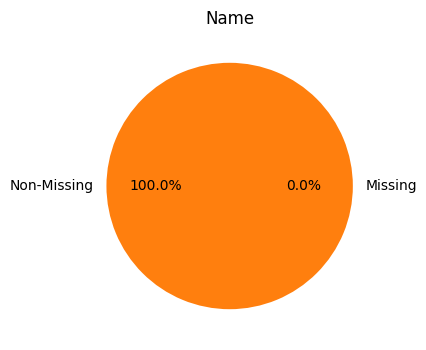

------------------------------------------------------------


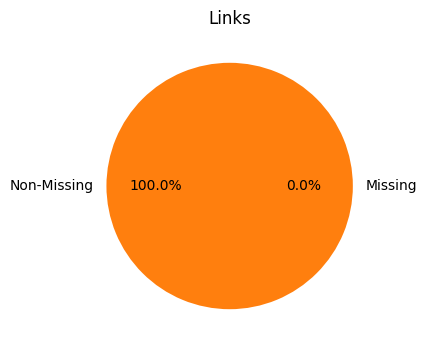

------------------------------------------------------------


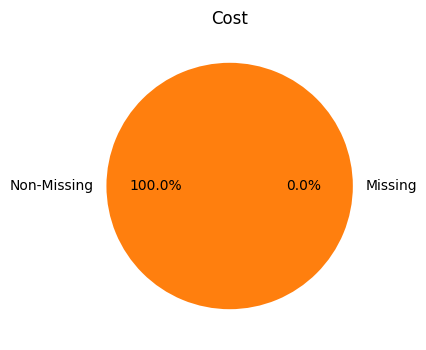

------------------------------------------------------------


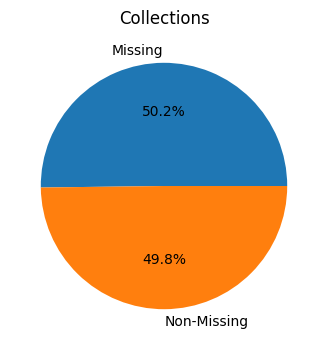

------------------------------------------------------------


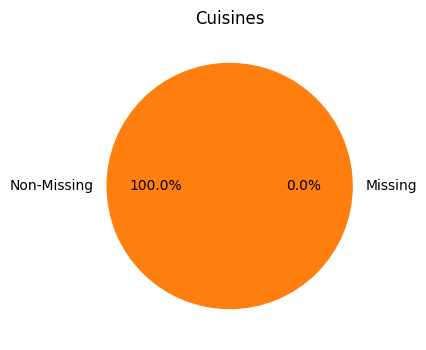

------------------------------------------------------------


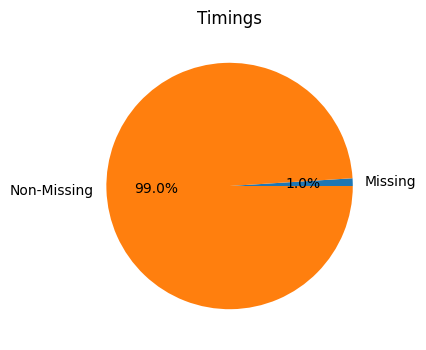

------------------------------------------------------------


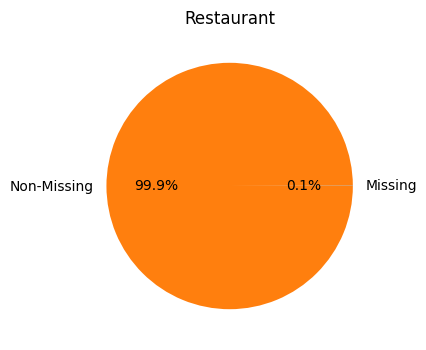

------------------------------------------------------------


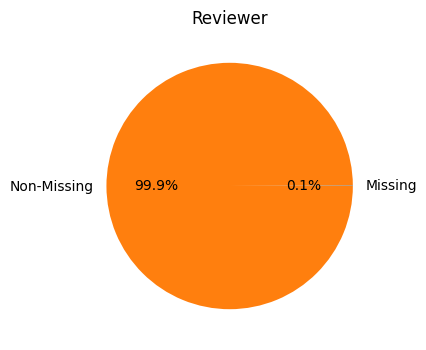

------------------------------------------------------------


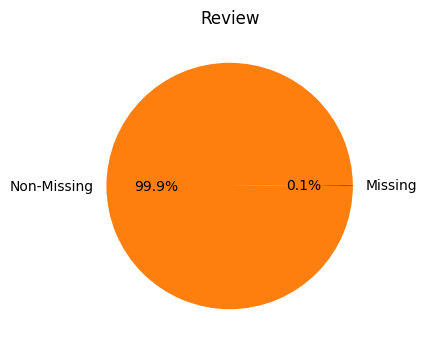

------------------------------------------------------------


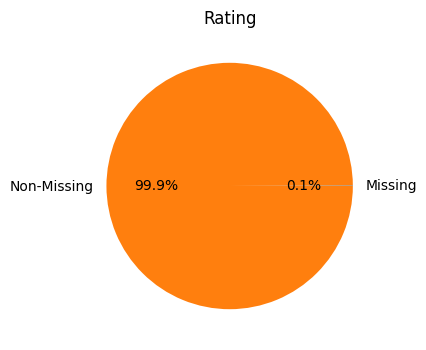

------------------------------------------------------------


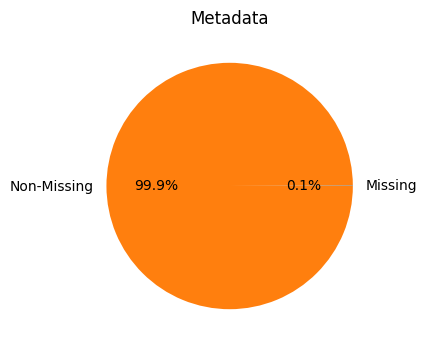

------------------------------------------------------------


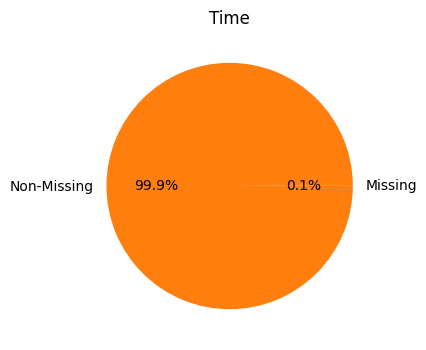

------------------------------------------------------------


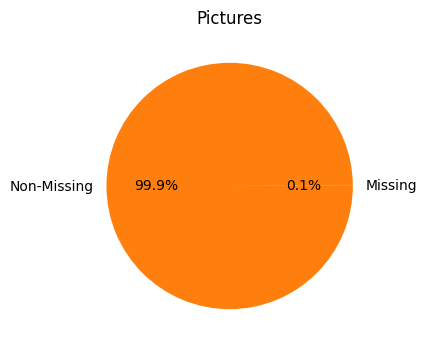

------------------------------------------------------------
Dataset have total None values 
 Name              0
Links             0
Cost              0
Collections    4893
Cuisines          0
Timings           0
Restaurant        0
Reviewer          0
Review            0
Rating            0
Metadata          0
Time              0
Pictures          0
dtype: int64
Shape of data set before dropping none value 
 (9969, 13)
Shape of data set after dropping none value 
 (9855, 13)


In [11]:
# Visualizing the missing values
for i in df.columns:
  # Calculate the percentage of missing values
  missing_percentage = df[i].isna().sum() * 100 / len(df)
  # Calculate the percentage of non-missing values
  non_missing_percentage = 100 - missing_percentage

  # Create a list of values for the pie chart
  values = [missing_percentage, non_missing_percentage]

  # Create labels for the pie chart segments
  labels = ['Missing', 'Non-Missing']

  # Create the pie chart
  plt.figure(figsize=(4,4))
  plt.pie(values, labels=labels, autopct='%1.1f%%')
  plt.title(i)
  plt.show()
  print('--'*30)
shapes=df.shape
# droping na value from dataset except 'Collection' variable
df.dropna(subset=['Name', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],inplace=True)
# Changing dataset after dropping None value
print('Dataset have total None values \n',df.isna().sum())
print('Shape of data set before dropping none value \n',shapes)
print('Shape of data set after dropping none value \n',df.shape)

In [12]:
# convert 'Cost' data type from object to Integer form
df['Cost']=df['Cost'].str.replace(',', '').astype('int64')
#convert Rating into integer form by replacing string value by float
df[df['Rating']=='Like']=3
df['Rating']=df['Rating'].astype('float')
# Convert 'Pictures' object to interger form
df['Pictures']=df['Pictures'].astype('int')
#drop columns Restaurant
df.drop('Restaurant',axis=1,inplace=True)

# convert datetime format
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9855 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         9855 non-null   object        
 1   Links        9855 non-null   object        
 2   Cost         9855 non-null   int64         
 3   Collections  4963 non-null   object        
 4   Cuisines     9855 non-null   object        
 5   Timings      9855 non-null   object        
 6   Reviewer     9855 non-null   object        
 7   Review       9855 non-null   object        
 8   Rating       9855 non-null   float64       
 9   Metadata     9855 non-null   object        
 10  Time         9855 non-null   datetime64[ns]
 11  Pictures     9855 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1000.9+ KB


### What did you know about your dataset?

Data set have Some variable has none value so We have drop that value whos percent is less than 1 and collections variable has 50.2% none value.

Some integer variable has data set in the form of object so we convert them into integer form.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print(df.columns)

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')


In [15]:
# Dataset Describe
df.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
count,9855,9855,9855.000000,4963,9855,9855,9855,9855,9855.000000,9855,9855,9855.000000
unique,100,100,NaN,43,89,75,7394,9264,NaN,2466,9677,NaN
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,NaN,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM,Ankita,good,NaN,1 Review,2019-05-05 22:39:00,NaN
freq,100,100,NaN,377,397,499,13,237,NaN,906,3,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000000003,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-25 20:23:00,NaN
mean,NaN,NaN,871.456418,NaN,NaN,NaN,NaN,NaN,3.603044,NaN,NaN,0.752106
std,NaN,NaN,506.081885,NaN,NaN,NaN,NaN,NaN,1.484481,NaN,NaN,2.579041
min,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000


### Variables Description

In [16]:
Descriptions=['Name of Restaurant','URL link of Restaurant','Per person estimated cost of dinning','Tagging of Restaurant w.r.t. Zomato category','Cuisines serve by Restaurant',
      'Restaurant timing','Name of reviwer','Review text','Rating provided','Reviewer metadata_No of review and followers','Date and time of review','No picture posted with review']
print('Dataset information\n')
Variables_Description=pd.DataFrame(list(zip(df.columns,Descriptions)),columns=['Variable','Description'])
print(Variables_Description)

Dataset information

       Variable                                   Description
0          Name                            Name of Restaurant
1         Links                        URL link of Restaurant
2          Cost          Per person estimated cost of dinning
3   Collections  Tagging of Restaurant w.r.t. Zomato category
4      Cuisines                  Cuisines serve by Restaurant
5       Timings                             Restaurant timing
6      Reviewer                               Name of reviwer
7        Review                                   Review text
8        Rating                               Rating provided
9      Metadata  Reviewer metadata_No of review and followers
10         Time                       Date and time of review
11     Pictures                 No picture posted with review


### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
for j, i in enumerate(df.columns):
  no_unique_value=df[i].nunique()
  no_value_count=df[i].value_counts()
  print(f"{j+1}- No of Unique {i} value is \n -{no_unique_value}")
  print(f"{j+1}- No of unique {i} value counts are \n -{no_value_count}")
  print('--'*30)

1- No of Unique Name value is 
 -100
1- No of unique Name value counts are 
 -Beyond Flavours                          100
Eat India Company                        100
The Indi Grill                           100
The Tilt Bar Republic                    100
Yum Yum Tree - The Arabian Food Court    100
                                        ... 
Amul                                      99
Hyderabad Chefs                           98
Arena Eleven                              85
American Wild Wings                       77
3                                          1
Name: Name, Length: 100, dtype: int64
------------------------------------------------------------
2- No of Unique Links value is 
 -100
2- No of unique Links value counts are 
 -https://www.zomato.com/hyderabad/beyond-flavours-gachibowli                        100
https://www.zomato.com/hyderabad/eat-india-company-gachibowli                      100
https://www.zomato.com/hyderabad/the-indi-grill-gachibowli                

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
df['Time'][0]

Timestamp('2019-05-25 15:54:00')

In [19]:
# Write your code to make your dataset analysis ready.

#Create new variable day,year,month and hour for checking review of customer with time.
df['Year']=df['Time'].dt.year
df['Day']=df['Time'].dt.day
df['Month']=df['Time'].dt.month
df['Hour']=df['Time'].dt.hour



In [20]:
df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Day,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019,25,5,15
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,2019,25,5,14


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Name
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Feast - Sheraton Hyderabad Hotel                     2500.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
10 Downing Street                                    1900.0
Cascade - Radisson Hyderabad Hitec City              1800.0
Zega - Sheraton Hyderabad Hotel                      1750.0
Mazzo - Marriott Executive Apartments                1700.0
B-Dubs                                               1600.0
Arena Eleven                                         1600.0
Barbeque Nation                                      1600.0
Name: Restaurant_Name, dtype: float64
------------------------------------------------------------
Name
3                                  3.0
Mohammedia Shawarma              150.0
Amul                             150.0
Momos Delight                    200.0
Hunger Maggi Point               200.0
Asian Meal Box                   200.0
KS Bakers                        200.0
Shah Ghouse Spl Sh

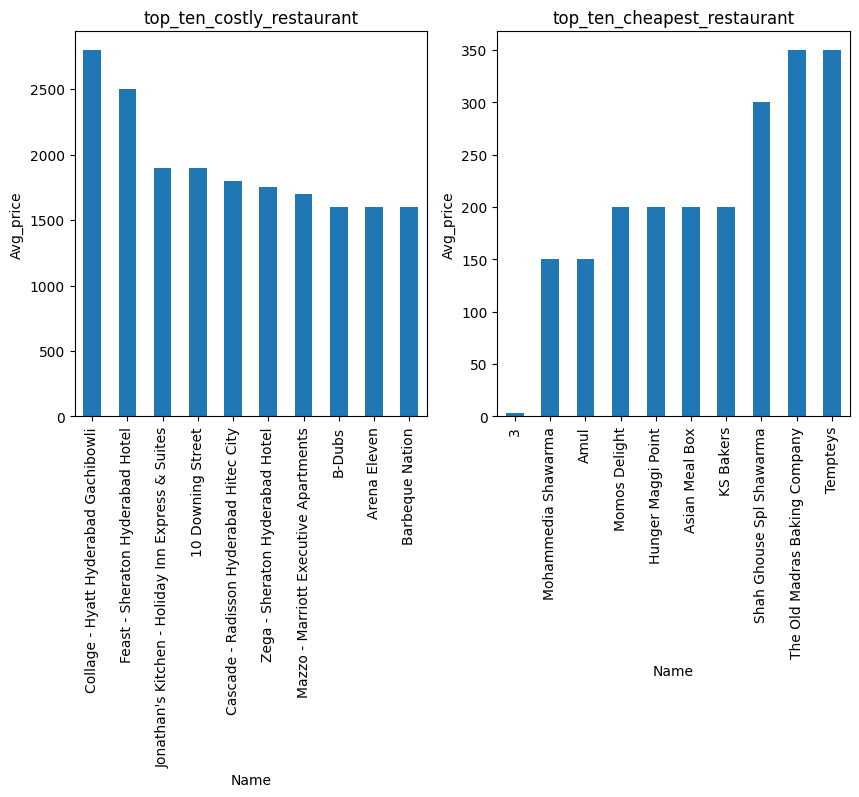

In [21]:
# Chart - 1 visualization code (Top and Bottom average cost restaurant )
#to check top ten avg cost of restaurant
top_ten_costly_restaurant=df.groupby('Name')['Cost'].mean().sort_values(ascending=False).rename("Restaurant_Name").head(10)
print(top_ten_costly_restaurant)
print('--'*30)

# to check Bottom ten avg cost of restaurant
top_ten_cheapest_restaurant=df.groupby('Name')['Cost'].mean().sort_values(ascending=True).rename("Restaurant_Name").head(10)
print(top_ten_cheapest_restaurant)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
top_ten_costly_restaurant.plot(kind='bar')
plt.title('top_ten_costly_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_price')
plt.subplot(1,2,2)
top_ten_cheapest_restaurant.plot(kind='bar')
plt.title('top_ten_cheapest_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_price')
plt.show()

##### 1. Why did you pick the specific chart?

* Bar chart easily showing comparison between the avg cost of each restaurant.

##### 2. What is/are the insight(s) found from the chart?

* 'Restaurant Collage - Hyatt Hyderabad Gachibowli'  has highest average cost (2800) and Restaurant '3' has lowest average cost (3)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes

#### Chart - 2

Name
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Restaurant_rating, dtype: float64
------------------------------------------------------------
Name
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
The Chocolate Room                       2.830
Shree Santosh Dhaba Family Restaurant    2.830
KFC                                      2.850
Club Rogue                       

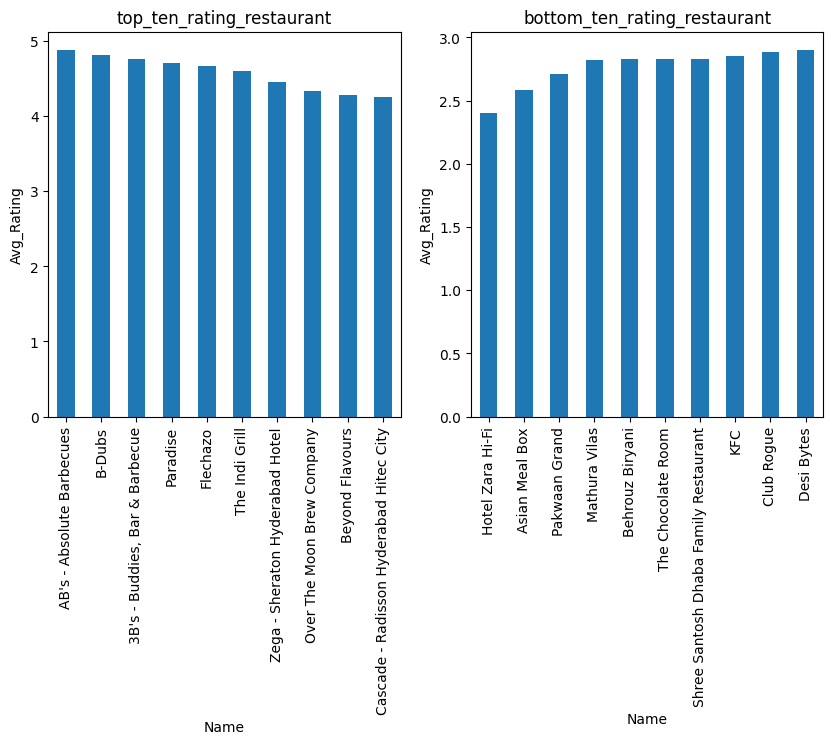

In [22]:
# Chart - 2 visualization code (highest and lowest avg rating to restaurant)

#to check top ten avg cost of restaurant
top_ten_rating_restaurant=df.groupby('Name')['Rating'].mean().sort_values(ascending=False).rename("Restaurant_rating").head(10)
print(top_ten_rating_restaurant)
print('--'*30)

# to check Bottom ten avg cost of restaurant
bottom_ten_rating_restaurant=df.groupby('Name')['Rating'].mean().sort_values(ascending=True).rename("Restaurant_rating").head(10)
print(bottom_ten_rating_restaurant)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
top_ten_rating_restaurant.plot(kind='bar')
plt.title('top_ten_rating_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_Rating')

plt.subplot(1,2,2)
bottom_ten_rating_restaurant.plot(kind='bar')
plt.title('bottom_ten_rating_restaurant')
plt.xlabel('Name')
plt.ylabel('Avg_Rating')
plt.show()


##### 1. Why did you pick the specific chart?

* It's easy to compare different output.

##### 2. What is/are the insight(s) found from the chart?

* Highest average rating for restaurant AB's - Absolute Barbecues (4.88)
* Lowest average rating for restaurant Hotel Zara Hi-Fi (2.4)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes.
* Those restaurant have lowest rating we want to check feedback and work on it.

#### Chart - 3

yearly_sales_trend --
 Year
2016      43000
2017     200750
2018    3517450
2019    4827000
Name: Cost, dtype: int64
--------------------------------------------------
monthly_sales_trend--
 Month        1         2         3          4          5         6         7   \
Year                                                                            
2016        NaN       NaN       NaN        NaN     2000.0    9000.0    3000.0   
2017     7000.0   11000.0    6000.0     4800.0    10800.0   15400.0   19600.0   
2018    27900.0    9700.0   42000.0   100500.0   151150.0  221050.0  776900.0   
2019   574100.0  625950.0  987100.0  1202450.0  1437400.0       NaN       NaN   

Month        8         9         10        11        12  
Year                                                     
2016     2000.0    1000.0    7000.0   10000.0    9000.0  
2017    26600.0   30000.0   18450.0   27700.0   23400.0  
2018   429000.0  432650.0  442350.0  402550.0  481700.0  
2019        NaN       NaN       

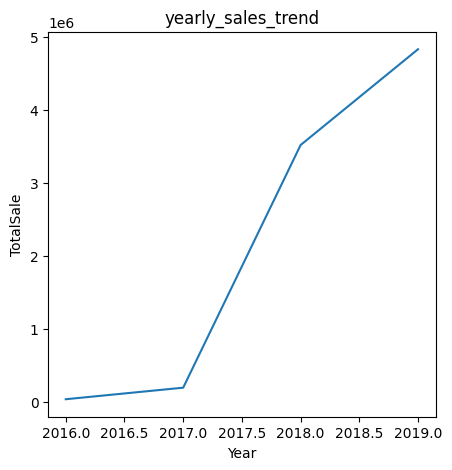

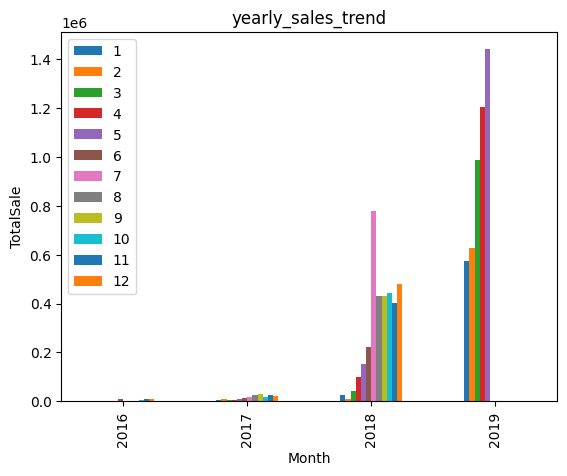

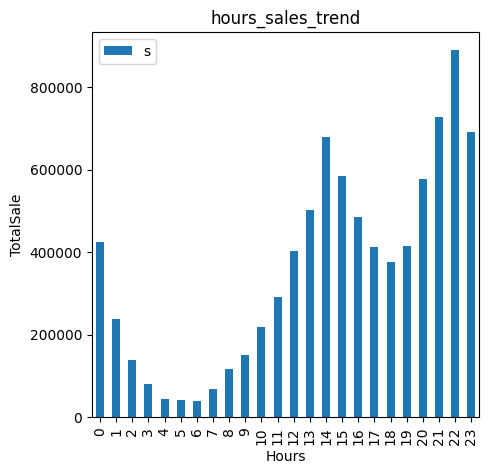

In [23]:
# Chart - 3 visualization code (Total sales with respect to year,month,day,hour)

# after checking data there is only one entry of data in year 1970 so we ignore it because its manual error
df=df[df['Year']!=1970]


yearly_sales_trend=df.groupby(['Year'])['Cost'].sum().sort_index(axis=0)
monthly_sales_trend=df.groupby(['Year','Month'])['Cost'].sum().sort_index(axis=0).unstack()
hours_sales_trend=df.groupby(['Hour'])['Cost'].sum().sort_index(axis=0)
print('yearly_sales_trend --\n',yearly_sales_trend)
print('--'*25)
print('monthly_sales_trend--\n',monthly_sales_trend)
print('--'*25)
print('hours_sales_trend--\n',hours_sales_trend)
print('--'*25)

# for yearly_sales_trend
plt.figure(figsize=(5,5))
plt.plot(yearly_sales_trend)
plt.title('yearly_sales_trend')
plt.xlabel('Year')
plt.ylabel('TotalSale')
plt.show()

# For monthly_sales_trend
monthly_sales_trend.plot(kind='bar')
plt.title('yearly_sales_trend')
plt.xlabel('Month')
plt.ylabel('TotalSale')
plt.legend(range(1,13))
plt.show()

# For hours_sales_trend
plt.figure(figsize=(5,5))
hours_sales_trend.plot(kind='bar')
plt.title('hours_sales_trend')
plt.xlabel('Hours')
plt.ylabel('TotalSale')
plt.legend('sales')
plt.show()

##### 1. Why did you pick the specific chart?

* To present data easily.

##### 2. What is/are the insight(s) found from the chart?

* Sales is increasing year on year.
* Sales is high during month april to july.
* Highest sales in night (10 PM) and then afternoon (2 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes Sales is increasing year on year and there is also showing that sale on peak point near month may and and time 10 pm and 2 pm.

#### Chart - 4

Rating
1.0    1718
1.5       9
2.0     675
2.5      19
3.0    1172
3.5      47
4.0    2340
4.5      69
5.0    3805
Name: Rating, dtype: int64


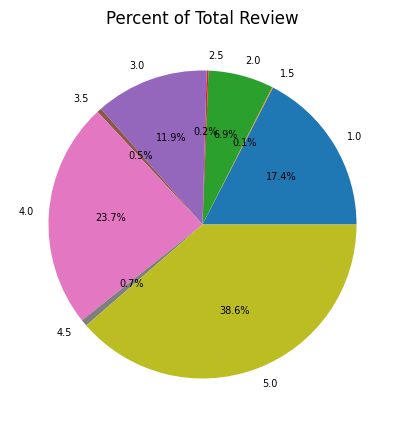

In [24]:
# Chart - 4 visualization code (Check top rating reviewer)

no_of_rating=df.groupby('Rating')['Rating'].count()
print(no_of_rating)
labels=np.linspace(1,5,9)
plt.figure(figsize=(5,5))
plt.pie(no_of_rating,labels=labels,autopct='%1.1f%%',textprops={'fontsize': 7})
plt.title('Percent of Total Review')
plt.show()


##### 1. Why did you pick the specific chart?

* To check percent of review comming from customers.

##### 2. What is/are the insight(s) found from the chart?

* There is coming 5 star review 38.6% and 1 star 17.4%

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes ,Need to do study on lowest review coming customer.

In [25]:
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Day,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019,25,5,15
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,2019,25,5,14
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2019,24,5,22
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,2019,24,5,22
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,2019,24,5,21


#### Chart - 5

top_rate_of_dishes --
 Cuisines
Continental, Italian, North Indian, Chinese, Asian    2800.0
Modern Indian, Asian, Continental, Italian            2500.0
North Indian, Japanese, Italian, Salad, Sushi         1900.0
North Indian, Italian, Continental, Asian             1800.0
Asian, Sushi                                          1750.0
Italian, North Indian, South Indian, Asian            1700.0
North Indian, Chinese, Continental                    1650.0
Mediterranean, North Indian, Kebab, BBQ               1600.0
American                                              1600.0
North Indian, Chinese, Japanese, Sushi                1500.0
Name: Cost, dtype: float64
----------------------------------------
bottom_rate_of_dishes --
 Cuisines
Street Food, Arabian           150.000000
Momos                          200.000000
Fast Food                      200.000000
Bakery, Desserts, Fast Food    200.000000
Asian                          200.000000
Ice Cream, Desserts            250.502513
Leb

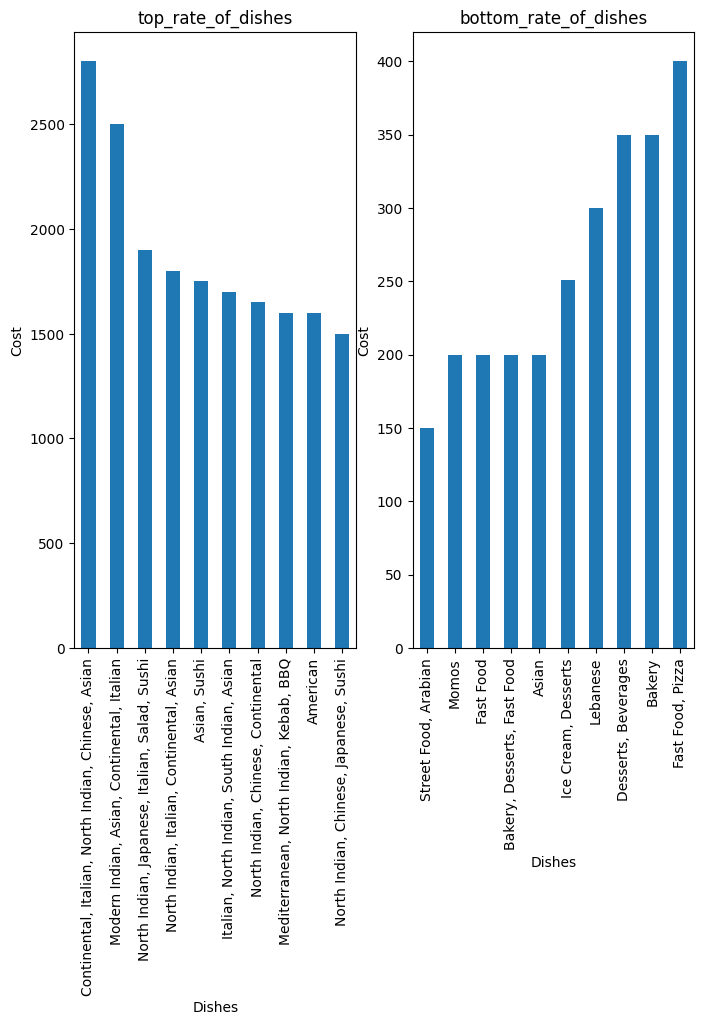

In [26]:
# Chart - 5 visualization code (Top and lowest rate of dishes)
# Tp find top_rate_of_dishes
top_rate_of_dishes=df.groupby('Cuisines')['Cost'].mean().sort_values(ascending=False).head(10)
# To find bottom_rate_of_dishes
bottom_rate_of_dishes=df.groupby('Cuisines')['Cost'].mean().sort_values(ascending=True).head(10)
print('top_rate_of_dishes --\n',top_rate_of_dishes)
print('--'*20)
print('bottom_rate_of_dishes --\n',bottom_rate_of_dishes)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
top_rate_of_dishes.plot(kind='bar')
plt.title('top_rate_of_dishes')
plt.xlabel('Dishes')
plt.ylabel('Cost')

plt.subplot(1,2,2)
bottom_rate_of_dishes.plot(kind='bar')
plt.title('bottom_rate_of_dishes')
plt.xlabel('Dishes')
plt.ylabel('Cost')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare data.

##### 2. What is/are the insight(s) found from the chart?

* Highest rate of dish - Continental, Italian, North Indian, Chinese, Asian    (2800.0)

* Lowest rate of dish - Street Food, Arabian (150.0)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

#### Chart - 6

In [27]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [28]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Correlation Heatmap

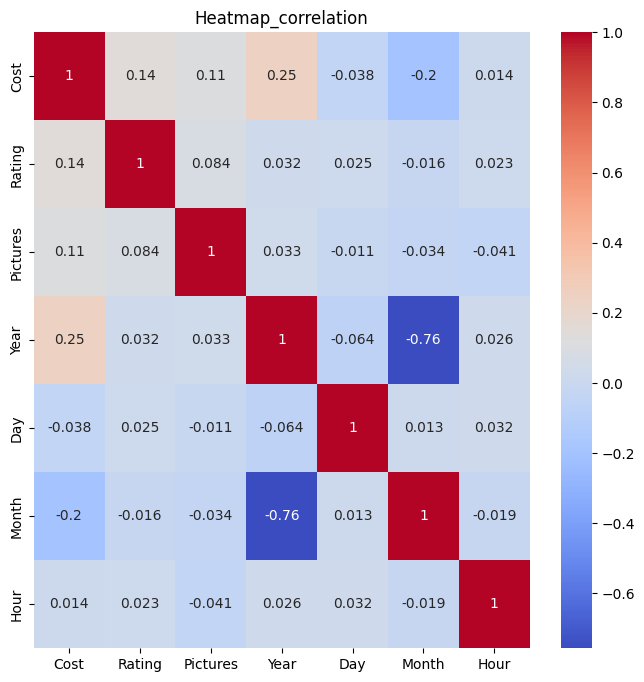

In [30]:
# Correlation Heatmap visualization code

df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap_correlation')
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize correlation between each variable easily.

##### 2. What is/are the insight(s) found from the chart?

* There is showing that all variable correlation between each other.

#### Chart - 10 - Pair Plot

<Figure size 500x500 with 0 Axes>

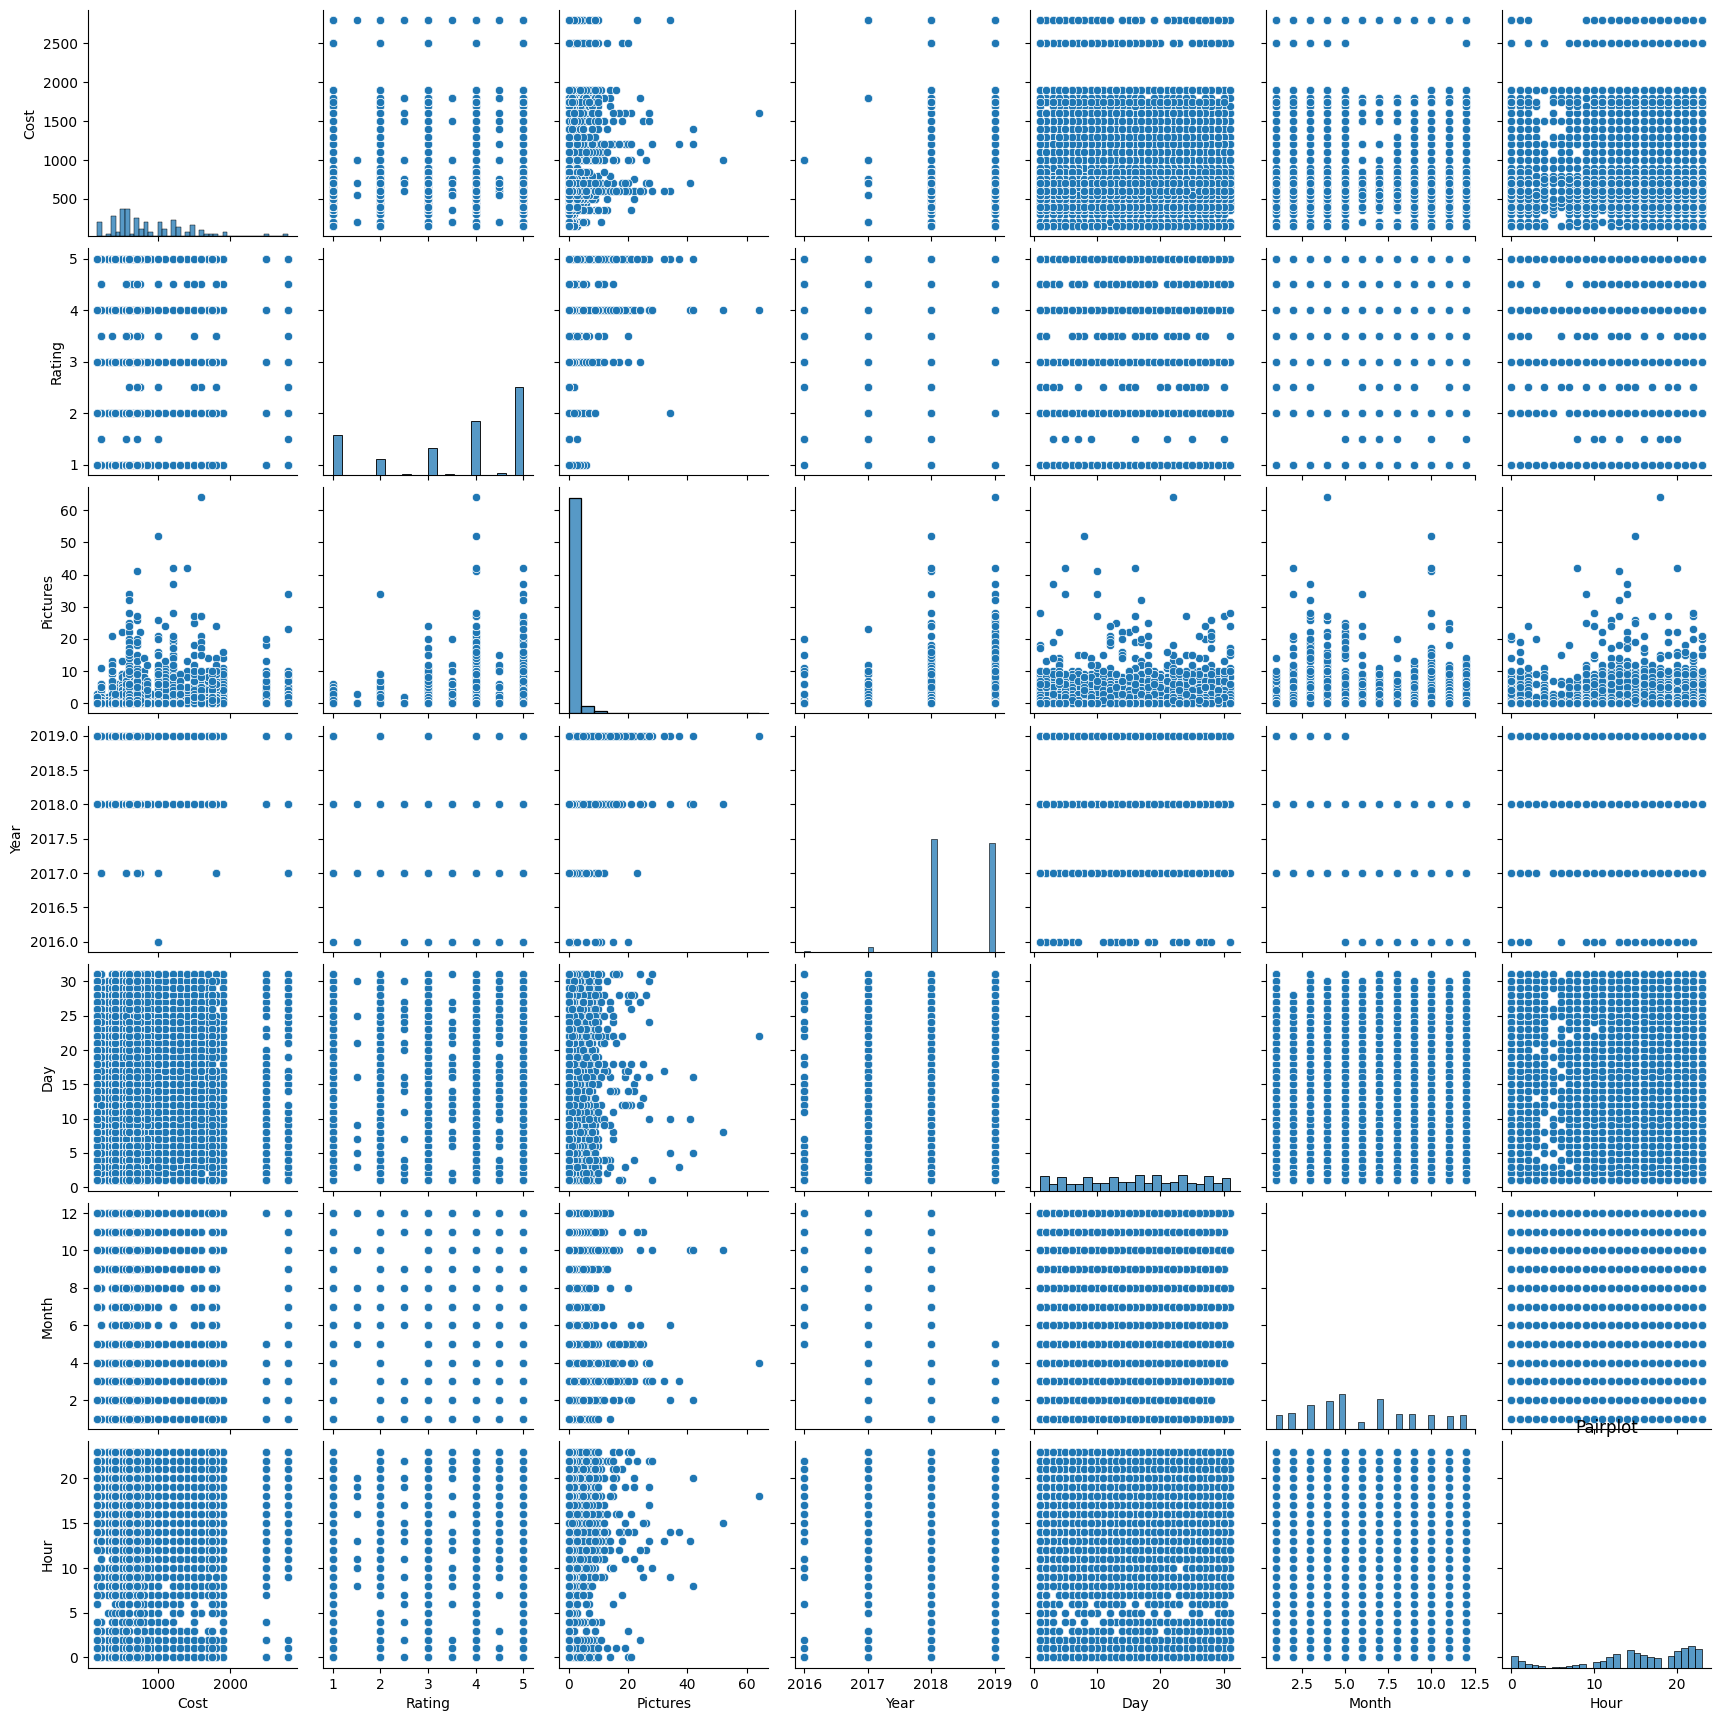

In [31]:
# Pair Plot visualization code
plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

##### 1. Why did you pick the specific chart?

* To show data distribution.

##### 2. What is/are the insight(s) found from the chart?

* To get information about data distribution.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

In [35]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Year',
       'Day', 'Month', 'Hour'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         9854 non-null   object        
 1   Links        9854 non-null   object        
 2   Cost         9854 non-null   int64         
 3   Collections  4962 non-null   object        
 4   Cuisines     9854 non-null   object        
 5   Timings      9854 non-null   object        
 6   Reviewer     9854 non-null   object        
 7   Review       9854 non-null   object        
 8   Rating       9854 non-null   float64       
 9   Metadata     9854 non-null   object        
 10  Time         9854 non-null   datetime64[ns]
 11  Pictures     9854 non-null   int64         
 12  Year         9854 non-null   int64         
 13  Day          9854 non-null   int64         
 14  Month        9854 non-null   int64         
 15  Hour         9854 non-null   int64         
dtypes: dat

In [37]:
Variables_Description

,Variable,Description
0,Name,Name of Restaurant
1,Links,URL link of Restaurant
2,Cost,Per person estimated cost of dinning
3,Collections,Tagging of Restaurant w.r.t. Zomato category
4,Cuisines,Cuisines serve by Restaurant
5,Timings,Restaurant timing
6,Reviewer,Name of reviwer
7,Review,Review text
8,Rating,Rating provided
9,Metadata,Reviewer metadata_No of review and followers


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation   (We did this above so just showing code here)

# droping na value from dataset except 'Collection' variable
# df.dropna(subset=['Name', 'Links', 'Cost', 'Cuisines', 'Timings',
#        'Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
#        'Pictures'],inplace=True)

# We drop Collections variable just because it has more than 50 % null value
df.drop('Collections',axis=1,inplace=True)

# we also ignore other variable for clustering, just only consider some variable that directly impact on Sales.
df=df[['Review','Rating','Cuisines','Cost']]

In [39]:
df=df[['Review','Rating','Cuisines','Cost']]

In [40]:
df.head(1)

,Review,Rating,Cuisines,Cost
0,"The ambience was good, food was quite good . h...",5.0,"Chinese, Continental, Kebab, European, South I...",800


#### What all missing value imputation techniques have you used and why did you use those techniques?

* We just drop none value just because its percent less than 0.1

### 2. Handling Outliers

In [41]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [42]:
df.columns

Index(['Review', 'Rating', 'Cuisines', 'Cost'], dtype='object')

In [43]:
# Encode your categorical columns

# variable 'Cuisines' has different category so we replace it by number to fit in models.
#cuisines has one entry 3 so we remove it from data
df=df[df['Cuisines']!='3']

# import labelEncoder to replace text data into numbers
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['Cuisines']=label.fit_transform(df['Cuisines'])


#### What all categorical encoding techniques have you used & why did you use those techniques?

* We used here LabelEncoder just because it convert all data into numerical form in single columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

In [44]:
# Lower Casing

#create function that convert all sentense into lower case

def Lowercasing(X):
  """Lowering the text"""
  return X.lower()

#Convert to lowrcase
df['Review']=df['Review'].apply(Lowercasing)

In [45]:
df['Review'][0]

'the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was really courteous and helpful.'

#### 3. Removing Punctuations

In [46]:
# Remove Punctuations

# Create function to remove punctuations

def Remove_punctuation(X):
  Conv=[i for i in X if i not in string.punctuation]
  return ''.join(Conv)

df['Review']=df['Review'].apply(Remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [47]:
# Remove URLs & Remove words and digits contain digits

#Remove numbers from sentense

def remove_num(X):
  '''Remove number from sentense'''
  rem=[i for i in X if i not in range(10)]
  return ''.join(rem)

#### 5. Removing Stopwords & Removing White spaces

In [48]:
# Remove Stopwords

pd.set_option('display.max_colwidth',None)
#Create function that remove Stopwords, Punctuation,
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])
#Create in above function
df['Review']=df['Review'].apply(text_process)

In [49]:
df['Review'][0]

'ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful'

In [50]:
# Remove White spaces (Already removed above)

#### 6. Rephrase Text

In [51]:
# Rephrase Text

#### 7. Tokenization

In [52]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
CountVect = vectorizer.fit_transform(df['Review'])

In [53]:
CountVect.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
vectorizer.get_feature_names_out()

array(['05', '10', '100', ..., 'zega', 'zero', 'zomato'], dtype=object)

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [56]:
df['Review'].shape

(9854,)

In [57]:
df['Review']=df['Review'].apply(stemming)

In [58]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
CountVect_stem = vectorizer.fit_transform(df['Review'])


In [59]:
print('Shape of data before stemming -\n',CountVect.shape)

Shape of data before stemming -
 (9854, 2667)


In [60]:
print('Shape of data after stemming -\n',CountVect_stem.shape)

Shape of data after stemming -
 (9854, 2178)


In [61]:
vectorizer.get_feature_names_out()

array(['05', '10', '100', ..., 'zero', 'zing', 'zomato'], dtype=object)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [62]:
# POS Taging

#### 10. Text Vectorization

In [63]:
pd.get_option('display.max_columns',None)

20

In [64]:
df['Review'][0]

'ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help'

In [65]:
# Vectorizing Text
a=pd.DataFrame(CountVect_stem.toarray())
a.columns=vectorizer.get_feature_names_out()

In [66]:
a.head()

,05,10,100,1010,10d,10pm,10th,11,12,1200,...,youv,yum,yumm,yummi,yummm,zafrani,zega,zero,zing,zomato
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Which text vectorization technique have you used and why?

* We used here CountVectorizer it is easy to understand.

### 4. Feature Manipulation & Selection

In [67]:
df.head(2)

,Review,Rating,Cuisines,Cost
0,ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help,5.0,31,800
1,ambienc good pleasant even servic prompt food good good experi soumen das kudo servic,5.0,31,800


#### 1. Feature Manipulation

In [68]:
# Manipulate Features to minimize feature correlation and create new features

df.corr()

#here no need to do feature manipulation

,Rating,Cuisines,Cost
Rating,1.000000,-0.044366,0.144864
Cuisines,-0.044366,1.000000,0.055429
Cost,0.144864,0.055429,1.000000


In [69]:
# Final data base
df=pd.concat([df,a],axis=1)

#### 2. Feature Selection

In [70]:
# Select your features wisely to avoid overfitting
print('We only consider below features -\n',df.columns)

We only consider below features -
 Index(['Review', 'Rating', 'Cuisines', 'Cost', '05', '10', '100', '1010',
       '10d', '10pm',
       ...
       'youv', 'yum', 'yumm', 'yummi', 'yummm', 'zafrani', 'zega', 'zero',
       'zing', 'zomato'],
      dtype='object', length=2182)


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
df.dropna(inplace=True)

In [75]:
df['Cost'].isna().sum()

0

In [82]:
df['Cost'].shape


(9708,)

In [79]:
df['Cost'].shape

(9708,)

In [84]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


### 6. Data Scaling

In [ ]:
# Scaling your data

df['Cost']=scaler.fit_transform(df[['Cost']])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

In [89]:
df.head()

,Review,Rating,Cuisines,Cost,05,10,100,1010,10d,10pm,...,youv,yum,yumm,yummi,yummm,zafrani,zega,zero,zing,zomato
0,ambienc good food quit good saturday lunch cost effect good place sate brunch one also chill friend parent waiter soumen das realli courteous help,5.0,31.0,-0.142463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ambienc good pleasant even servic prompt food good good experi soumen das kudo servic,5.0,31.0,-0.142463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,must tri great food great ambienc thnx servic pradeep subroto person recommend penn alfredo pasta also music background amaz,5.0,31.0,-0.142463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,soumen das arun great guy behavior sincereti good food cours would like visit place,5.0,31.0,-0.142463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,food goodw order kodi drumstick basket mutton biryani good thank pradeep serv well enjoy ambienc also good,5.0,31.0,-0.142463,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.

X=df.drop('Review',axis=1)

In [100]:
from sklearn.cluster import KMeans


# Let us check optimal number of clusters-


cluster_range = range( 1, 8)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia



# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]


,num_clusters,cluster_errors
0,1,6.449254e+06
1,2,1.855032e+06
2,3,1.067164e+06
3,4,7.598877e+05
4,5,6.014790e+05
5,6,5.274112e+05
6,7,4.888632e+05


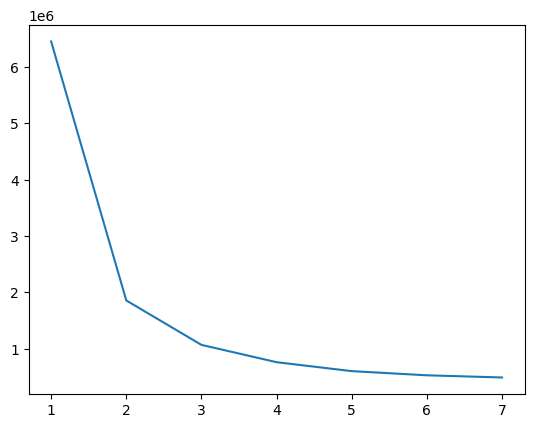

In [101]:
plt.plot(cluster_range,cluster_errors)

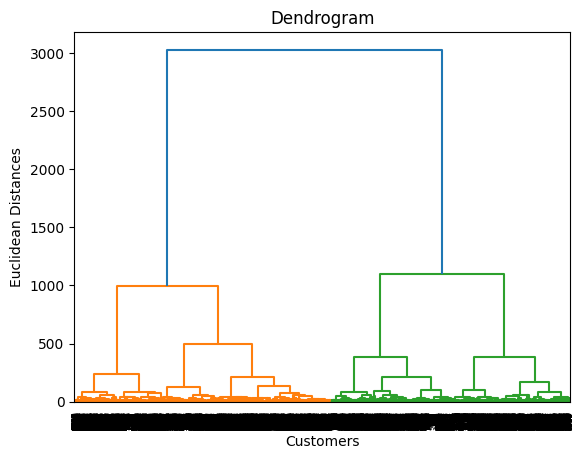

In [102]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***